# Week 6 -  Measurements and information extraction <a class="tocSkip">
    (c) Ariel Guerreiro 2023

Quantum information systems rely on the peculiarities of quantum mechanics to encode, transmit and manipulate information. A crucial aspect of quantum systems is the ability to obtain information about the system through measurements. Measurements allow us to gather data about the observable properties of a quantum state, such as the position or momentum of a particle.

However, in quantum information systems, information is encoded in the quantum state itself, which means that in some cases, it is not sufficient to measure only the observables properties of that system. Instead, it is necessary to pinpoint the quantum state of the system to retrieve such information. This requires careful consideration of both the limitations of measurements performed on quantum systems and the methods to retrieve information from it.

One of the most notable peculiarities of quantum mechanics is the collapse of the wave function. When a quantum system is measured, the wave function collapses to one of the possible eigenstates of the measured observable. This means that measurements on a quantum system can introduce significant quantum fluctuations, which must be taken into account when interpreting the results.

To retrieve information encoded in a quantum state, it is often necessary to perform quantum state tomography. This process involves making a series of measurements on the system and then using statistical inference to reconstruct the quantum state. However, even with state-of-the-art techniques, quantum state tomography is a challenging task due to the high dimensionality of the state space and the fragility of quantum systems.

Throughout this notebook, we will use interactive examples and exercises to help you gain a deeper understanding of these complex topics.

# Before we start... <a class="tocSkip">

  Let us begin by runnning the initialization cell
    
$$
\def\ket#1{\left|#1\right\rangle }%
\def\bra#1{\left\langle #1\right|}%
\def\braket#1#2{\langle#1|#2\rangle}%
$$
   

In [1]:
!pip install qiskit==0.43

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.5/241.5 kB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 60.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 40.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 13.2 MB/s eta 0:00:00
     ━━━━━━━━

In [2]:
import numpy as np
import math as mt
import matplotlib.pyplot as plt
import random
import re             # regular expressions module

from pylab import plot
from qiskit import *
from qiskit.visualization import *

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# State colapse <a name='Colapse'></a>

The act of measurement in quantum mechanics is closely related to the collapse of the wave function. When a measurement is performed on a quantum system, the wave function collapses to one of the possible eigenstates of the measured observable. In the case of the simple circuit in the previous code, measuring the state of the qubit causes its wave function to collapse to either the |0⟩ or |1⟩ state with a certain probability determined by the superposition state of the qubit before measurement.

Just to start, consider the simplest implementation of the wave collapse using Qiskit:

In [3]:
# Create a Quantum Circuit acting on a quantum register of 1 qubits and 2 bits
circuit = QuantumCircuit(1,2)
# Add a H gate on qubit 0, putting this qubit in superposition.
circuit.h(0)
circuit.measure(0,0)
circuit.measure(0,1)
circuit.draw()

┌───┐┌─┐┌─┐
  q: ┤ H ├┤M├┤M├
     └───┘└╥┘└╥┘
c: 2/══════╩══╩═
           0  1

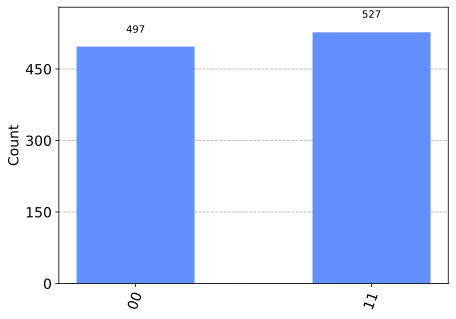

In [4]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit,backend=simulator).result()
plot_histogram(result.get_counts(circuit))

<div class="alert alert-block alert-warning">
<b>Code Explained: </b>    

In the first line, a quantum circuit object is created using the QuantumCircuit() function. The circuit is defined to have one quantum register, which consists of one qubit, and two classical bits.

Next, a Hadamard (H) gate is added to the qubit at index 0 using the circuit.h(0) method. This gate puts the qubit into a superposition of the |0⟩ and |1⟩ states. Then, two classical measurement operations are added to the circuit using circuit.measure(0,0) and circuit.measure(0,1). These operations measure the state of the qubit at index 0 and store the result in the classical bits at index 0 and 1, respectively.

Finally, the circuit is drawn using the circuit.draw() method to visualize the circuit diagram.

After defining the circuit, the code uses the Aer.get_backend() function to choose a backend simulator to run the circuit. The chosen backend is the qasm_simulator, which simulates the behavior of a quantum circuit on a classical computer.

The circuit is then executed using the execute() method, which takes the circuit and the chosen backend as arguments. The result of the execution is stored in the result variable.

Finally, the histogram of the measurement outcomes is plotted using the plot_histogram() function from Qiskit.visualization. The function takes the counts of the measurement outcomes from the result object, which is obtained using the result.get_counts() method, and plots the histogram using matplotlib.
    
</div>


As this example illustrates, in quantum mechanics, when a measurement is performed on a quantum system, the wave function describing the system is said to collapse to one of the eigenstates of the measured observable. This collapse is irreversible and can have important consequences for subsequent measurements on the same system.

In the case of a qubit in the computational basis, a measurement can only result in one of two possible outcomes: |0⟩ or |1⟩. If the initial state of the qubit is a superposition state, such as (|0⟩ + |1⟩)/√2, measuring the qubit in the computational basis will cause the wave function to collapse to either the |0⟩ or |1⟩ state with a certain probability determined by the coefficients of the superposition state.

Once the wave function has collapsed to one of the eigenstates, any subsequent measurements on the same qubit will only yield the same result as the first measurement. This is because the wave function has collapsed to a specific eigenstate and subsequent measurements will not change the outcome, as further shown in the following example.

In [5]:
# Create a Quantum Circuit acting on a quantum register of 1 qubits and 2 bits
circuit = QuantumCircuit(1,4)
# Add a H gate on qubit 0, putting this qubit in superposition.
circuit.h(0)
circuit.measure(0,0)
circuit.measure(0,1)
circuit.measure(0,2)
circuit.measure(0,3)
circuit.draw()

┌───┐┌─┐┌─┐┌─┐┌─┐
  q: ┤ H ├┤M├┤M├┤M├┤M├
     └───┘└╥┘└╥┘└╥┘└╥┘
c: 4/══════╩══╩══╩══╩═
           0  1  2  3

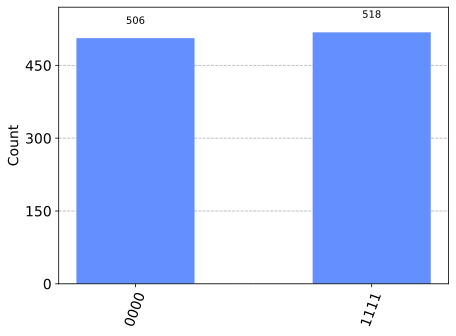

In [6]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit,backend=simulator).result()
plot_histogram(result.get_counts(circuit))

In a multipartite quantum system, where multiple qubits are entangled with each other, the collapse of the wave function due to a measurement can have complex effects on the entanglement structure of the system.

When a measurement is performed on a qubit in a multipartite system, the wave function describing the entire system collapses to one of the possible eigenstates of the measured observable. This collapse affects not only the measured qubit but also the entangled qubits in the system.

If the entangled qubits were initially in a superposition state with the measured qubit, the collapse of the wave function will cause the entangled qubits to also collapse to a specific eigenstate. This can result in a change in the entanglement structure of the system, as the entangled qubits may now be in a different entangled state with each other.

Furthermore, the collapse of the wave function due to a measurement on one qubit can also have nonlocal effects on other entangled qubits in the system. This is known as quantum nonlocality and is a consequence of entanglement in quantum mechanics.

The precise effects of wave function collapse on the entanglement structure of a multipartite quantum system depend on the specific details of the system and the measurements being performed.

To exemplify some of the impacts of measurements on qubits, consider the next circuit. The quantum state generated is a superposition of the two-qubit states |00⟩ and |11⟩ with controlled overlap coefficients. The state can be written as:

$$|\psi\rangle = \frac{1}{\sqrt{2}} \left(\sqrt{1-\alpha^2}|00\rangle + \alpha |11\rangle\right)$$

where $\alpha$ is the overlap coefficient controlled by the rotation gate.

In [7]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram

# Create a Quantum Circuit acting on a quantum register of 2 qubits and 2 bits
circuit = QuantumCircuit(2,6)

# Prepare the initial state as a superposition of |00> and |11>
overlap_coef = 0.5  # adjust this parameter to control the overlap coefficients
circuit.h(0)
circuit.cx(0, 1)
circuit.ry(2 * overlap_coef * np.arcsin(np.sqrt(1 - overlap_coef**2)), 1)

# Measure both qubits in the computational basis
circuit.measure([0,1],[0,1])
circuit.measure([0,1],[2,3])
circuit.measure([0,1],[4,5])
circuit.draw()

┌───┐                ┌─┐   ┌─┐   ┌─┐   
q_0: ┤ H ├──■─────────────┤M├───┤M├───┤M├───
     └───┘┌─┴─┐┌─────────┐└╥┘┌─┐└╥┘┌─┐└╥┘┌─┐
q_1: ─────┤ X ├┤ Ry(π/3) ├─╫─┤M├─╫─┤M├─╫─┤M├
          └───┘└─────────┘ ║ └╥┘ ║ └╥┘ ║ └╥┘
c: 6/══════════════════════╩══╩══╩══╩══╩══╩═
                           0  1  2  3  4  5

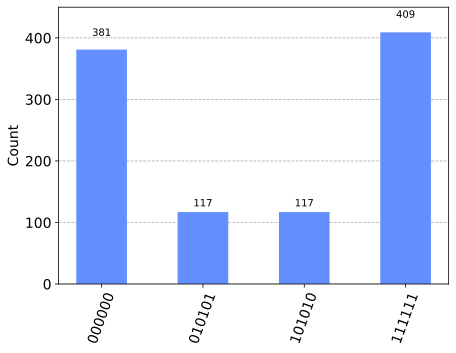

In [8]:
# Run the simulation and plot the results
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit,backend=simulator).result()
plot_histogram(result.get_counts(circuit))

After measurement, the state collapses to one of the computational basis states |00⟩ or |11⟩ with probabilities given by the squared magnitudes of the coefficients in the superposition. The measurement outcomes can be visualized using a histogram of the measurement counts, as shown in the output of the plot_histogram() function in the previous code example.

<div class="alert alert-block alert-info">
<b>Question 1:</b> Provide an interpretation of the results of the previous circuit.
</div>


The maximally entangled state for a system of N qubits is known as the "N-qubit GHZ state", which is given by:

$$|\mathrm{GHZ}\rangle = \frac{1}{\sqrt{2}} \left(|0\rangle^{\otimes N} + |1\rangle^{\otimes N}\right)$$

where $|0\rangle^{\otimes N}$ represents the tensor product of $N$ individual $|0\rangle$ states, and $|1\rangle^{\otimes N}$ represents the tensor product of $N$ individual $|1\rangle$ states.

The N-qubit GHZ state is maximally entangled because it is impossible to factorize it into a product of single-qubit states or pairs of qubits, meaning that the entanglement is spread out over all N qubits. It exhibits a type of correlation known as "Einstein-Podolsky-Rosen (EPR) steering", where the measurement outcomes on one qubit can be used to predict the outcomes on the other qubits, even if they are spatially separated.

The GHZ state is an important resource in quantum information processing, as it enables certain types of distributed quantum protocols such as quantum secret sharing and quantum teleportation. It is also used as a testbed for experimental demonstrations of multipartite entanglement and nonlocality.


<div class="alert alert-block alert-info">
<b>Question 2:</b> How will the entanglement of the N-qubit GHZ state decreases as one measures more and more qubits in the computational basis?
</div>

# Random number generator


A quantum random generator (QRG) is a device that generates truly random numbers using quantum mechanics. Unlike classical random number generators (RNGs), which generate numbers based on deterministic algorithms or physical processes that are difficult to predict, QRGs rely on the inherently unpredictable behavior of quantum systems to produce random outcomes.

QRGs typically use some form of quantum measurement or state preparation to extract randomness from quantum systems. For example, a QRG may use the polarization of a photon or the spin of an electron to generate random bits. The resulting random numbers are truly unpredictable, as they are derived from quantum processes that are inherently uncertain.

One key difference between QRGs and classical RNGs is the level of unpredictability that they offer. While classical RNGs can generate sequences of numbers that are statistically random, they are ultimately deterministic and can be potentially predictable with enough knowledge of the algorithm or physical process used to generate them. In contrast, QRGs are fundamentally unpredictable due to the inherent uncertainty of quantum mechanics.

Applications of QRGs include cryptography, simulations, and games. In cryptography, truly random numbers are essential for generating secure encryption keys and ensuring the privacy of sensitive information. QRGs can also be used in simulations to generate random inputs for complex models or algorithms, and in games to provide players with truly unpredictable outcomes.

The idea behind a quantum random number generator is to create a set of several qubits, each in an ovelap od $|0\rangle$ and $|1\rangle$ with equal probability, such as the result from applying an Hadamard gate to a $|0\rangle$ state.

In [9]:
 # Quantum Random Number generator
qubits = 6
q = QuantumRegister(qubits, 'q')
c = ClassicalRegister(qubits, 'c')
circuit6 = QuantumCircuit(q,c)

#In every register produce a cat state
for i in range(qubits):
    circuit6.h(q[i])

#In every register measure
for i in range(qubits):
    circuit6.measure(q[i], c[i])

circuit6.draw()

┌───┐┌─┐               
q_0: ┤ H ├┤M├───────────────
     ├───┤└╥┘┌─┐            
q_1: ┤ H ├─╫─┤M├────────────
     ├───┤ ║ └╥┘┌─┐         
q_2: ┤ H ├─╫──╫─┤M├─────────
     ├───┤ ║  ║ └╥┘┌─┐      
q_3: ┤ H ├─╫──╫──╫─┤M├──────
     ├───┤ ║  ║  ║ └╥┘┌─┐   
q_4: ┤ H ├─╫──╫──╫──╫─┤M├───
     ├───┤ ║  ║  ║  ║ └╥┘┌─┐
q_5: ┤ H ├─╫──╫──╫──╫──╫─┤M├
     └───┘ ║  ║  ║  ║  ║ └╥┘
c: 6/══════╩══╩══╩══╩══╩══╩═
           0  1  2  3  4  5

Repeating this over a large number of qubits allows to obtain a random number in binary form. Since the probability of each binary digit being either 0 or 1 is the same, the probability distribution over all possible number is uniform.

To develop a random number generator, we begin by coding a dictionary that maps binary numbers to decimal integers.

In [10]:
def getKeysByValue(dictOfElements, valueToFind):
    listOfKeys = list()
    listOfItems = dictOfElements.items()
    for item  in listOfItems:
        if item[1] == valueToFind:
            listOfKeys.append(item[0])
    return  listOfKeys

Then we develop a 6 qubit circuit. This means that our random number generator will be able to cast decimal integer values between 0 and 1+2+4+8+16+32 = 63.

Let us start with the example of generating a single random number.

In [11]:
backend = Aer.get_backend('statevector_simulator')
job = execute(circuit6, backend)
    #print(job.status())
result = job.result()
output = result.get_statevector(circuit6, decimals=5)
measurement_result = result.get_counts(circuit6)
print(output)
print(measurement_result)

Statevector([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j],
            dims=(2, 2, 2, 2, 2, 2))
{'001000': 1}


An now convert the binary representation into the corresponding decimal.

In [12]:
number = int(getKeysByValue(measurement_result,1)[0],2)
print(number)

8


To make the random number generator a bit more versatile and not limited to obtaing integer values between 0 and $2^{n-1}-1$, let us introduce a scaling function.

In [13]:
def real_map(value, leftMin, leftMax, rightMin, rightMax):
    # Maps one range to another
    # Figure out how 'wide' each range is
    leftSpan = leftMax - leftMin
    rightSpan = rightMax - rightMin

    # Convert the left range into a 0-1 range (float)
    valueScaled = float(value - leftMin) / float(leftSpan)

    # Convert the 0-1 range into a value in the right range.
    return rightMin + (valueScaled * rightSpan)

In [14]:
print(real_map(number,0, mt.pow(2,qubits),0,100))

12.5


Finally, the random number generator function can be constructed. Notice that this ranbom number generator produces a uniform distribution of values.

In [15]:
def QRandom(a, b, qubits=2):
    # Quantum Random Number generator
    q = QuantumRegister(qubits, 'q')
    c = ClassicalRegister(qubits, 'c')
    circ = QuantumCircuit(q,c)

    for i in range(qubits):
        circ.h(q[i])


    for i in range(qubits):
        circ.measure(q[i], c[i])

    #circ.draw(output='mpl')


    backend = Aer.get_backend('statevector_simulator')
    job = execute(circ, backend)
    #print(job.status())
    result = job.result()
    measurement_result = result.get_counts(circ)

    number = int(getKeysByValue(measurement_result,1)[0],2)

    return real_map(number,0, mt.pow(2,qubits), a, b)

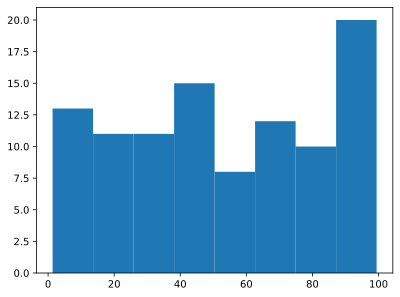

In [16]:
x = []
for i in range(100):
    x.append( QRandom(0, 100, qubits = 10) )

n, bins, patches = plt.hist(x=x, bins='auto',)

#plt.plot(x,'o')


plt.show()

**Exercise 1:**
1) Scale the results of the random generator for several distributions
    
    a) binomial distribution;
    
    b) normal distribution.

  
2) Determine how the running time of the random generator depends on the number of qubits used.
    
3) Repeat the previous question using  the IBM computer.

4) Comment on the previous results.

**Exercise 2:**
1) Adapt the following code to yield a random generator with the distributions
    
    a) binomial distribution;
    
    b) normal distribution;
    
Directly from the quantum measurements, without the need to rescale the measurement results.

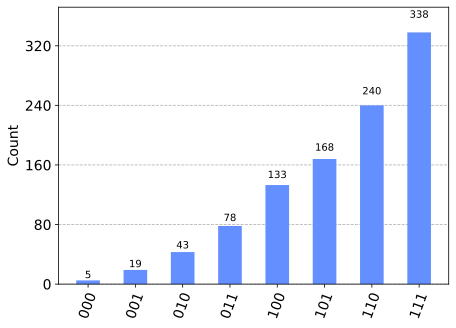

In [17]:
from qiskit import *
import numpy as np

# Set the number of qubits
N = 3

# Set the coefficients of the superposition
coeffs = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]

# Normalize the coefficients
coeffs_norm = np.sqrt(np.sum(np.square(coeffs)))
coeffs = np.array(coeffs) / coeffs_norm

# Initialize the circuit
qc = QuantumCircuit(N, N)

# Prepare the generic quantum state
qc.initialize(coeffs, range(N))

# Measure all the qubits
qc.measure(range(N), range(N))

# Run the circuit on a simulator backend
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc, backend=simulator).result()

# Get the counts from the result
counts = result.get_counts(qc)

# Plot the histogram of the measurement outcomes
plot_histogram(counts)


# Measurement statistics and quantum fluctuations


In quantum mechanics, measurements are fundamental to the study and understanding of quantum systems. However, the results of measurements on quantum systems can be unpredictable due to the inherent probabilistic nature of quantum mechanics. This unpredictability leads to statistical fluctuations in the measured results, which can pose a challenge when trying to extract information about the underlying quantum system.

When performing measurements on quantum systems, such as a set of qubits, there are three types of fluctuations that can be present: quantum fluctuations, sampling fluctuations, and thermal fluctuations.

Quantum fluctuations arise due to the probabilistic nature of quantum mechanics, and are related to the Heisenberg uncertainty principle. They can cause the measured values of a quantum observable to fluctuate even in the absence of external noise sources. Sampling fluctuations, on the other hand, arise due to the finite number of measurements that can be made on a quantum system. The statistical fluctuations in the measured results decrease as the number of measurements increases, and the mean value of the results converges to the expected value of the quantum observable. Finally, thermal fluctuations arise due to environmental noise sources, such as temperature fluctuations or electromagnetic radiation, which can affect the state of the quantum system and cause additional statistical fluctuations in the measured results.

To identify these different types of fluctuations in experimental data, it is important to analyze the statistics of the measured results. The mean value of the results should converge to the expected value of the quantum observable as the number of measurements increases. The standard deviation of the results can be used to estimate the level of quantum fluctuations present in the data, and can be compared to the expected level of quantum fluctuations for the specific quantum system being studied. If the standard deviation is larger than expected, additional noise sources, such as sampling or thermal fluctuations, may be present. The correlation between measurements at different times can also be used to identify the presence of thermal fluctuations.

Now, you are provided with an example of a measurement experiment to illustrate the impact of fluctuations in the results of measurements:

In [ ]:
def getKeysByValue(dictOfElements, valueToFind):
    listOfKeys = list()
    listOfItems = dictOfElements.items()
    for item  in listOfItems:
        if item[1] == valueToFind:
            listOfKeys.append(item[0])
    return  listOfKeys

def calsum(str1):
    Sum = 0
    for ch in str1:
        if (ch.isdigit()):
            Sum += int(ch)
    return Sum

In [19]:
def Experiment(qubits=2):
    # Quantum Random Number generator
    q = QuantumRegister(qubits, 'q')
    c = ClassicalRegister(qubits, 'c')
    circ = QuantumCircuit(q,c)

    for i in range(qubits):
        circ.h(q[i])


    for i in range(qubits):
        circ.measure(q[i], c[i])

    #circ.draw(output='mpl')


    backend = Aer.get_backend('statevector_simulator')
    job = execute(circ, backend)
    #print(job.status())
    result = job.result()
    measurement_result = result.get_counts(circ)

    number = calsum(getKeysByValue(measurement_result,1)[0])/qubits

    return number

In [20]:
n_exp = 100
n_bits = 4
label = 5*np.arange(n_bits)+1
data =[]
for qubits in label:
    x = []
    for i in range(n_exp):
        x.append( Experiment(qubits = qubits) )
    data.append(x)

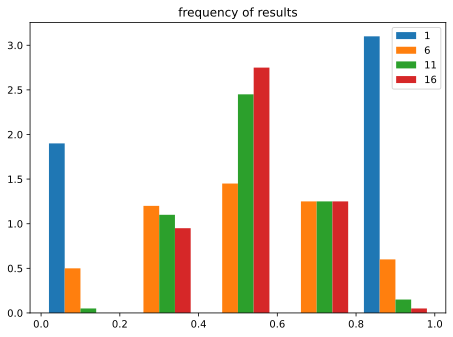

In [21]:
n_bins = 5
fig, axes = plt.subplots()
axes.hist(data, n_bins, density=True, histtype='bar',  label=label)
axes.legend(prop={'size': 10})
axes.set_title('frequency of results')
fig.tight_layout()
plt.show()

<div class="alert alert-block alert-warning">
<b>Code Explained: </b>    
    
The getKeysByValue function takes a dictionary and a value, and returns a list of keys that correspond to that value in the dictionary. The calsum function takes a string and sums all the digits present in the string.

The Experiment function takes an optional argument qubits (default value 2) which specifies the number of qubits to use for the QRNG. A quantum circuit is constructed using qubits and classical bits initialized as quantum and classical registers respectively. The Hadamard gate is applied to each qubit, putting it in a superposition of 0 and 1. The circuit is then measured in the computational basis, and the resulting measurement is stored as a bit string. The bit string is then used to generate a random number by summing all the digits in the bit string and dividing it by the number of qubits used.

The Experiment function is called with different values of qubits for n_exp (default value 100) times. The resulting random numbers are collected in the data list. The hist function is used to create a histogram of the generated random numbers for each qubits value, with the number of bins set to n_bins (default value 5). The resulting histogram is plotted using matplotlib.
    
</div>


<div class="alert alert-block alert-info">
<b>Question 3:</b> Can you explain the rational of this algorithm?
    
Hint: Check the supplementary videos in the moodle webpage.
    
</div>

**Exercise 3:**

Plot the evolution of the

a) mean number of counts as a function of the number of measurements.
    
b)  standard deviation of counts as a function of the number of measurements.

### Advanced exercises (for extra credits)<a class="tocSkip">
    
**Exercise 4:**
    
    Spice things up by adding noise into the previous model and analyze the differences in measurement statistics.
    
    
**Exercise 5:**
    
    To really test your mastery, incorporate measurement imperfections in the previous model and analyze the differences in measurement statistics.

# Quantum state tomography


antum state tomography is a technique used in quantum mechanics to reconstruct the complete quantum state of a physical system. In other words, it is a method to determine the density matrix of a quantum system, which describes the probability of finding the system in any given state.

The technique involves performing a series of measurements on the system in order to obtain information about its state. The measurements are made in different bases, which allows for a complete description of the state. The results of the measurements are then used to reconstruct the density matrix of the system.

The process of quantum state tomography involves several steps. First, a set of measurements is chosen, typically involving a set of operators that form a basis for the space of states of the system. The measurements are then performed on a large number of identically prepared copies of the system. The results of the measurements are recorded and used to calculate the probabilities of the different measurement outcomes.

The next step is to use the probabilities to estimate the density matrix of the system. This is typically done using maximum likelihood estimation or other type of inference, which involves finding the density matrix that is most likely to have produced the observed measurement outcomes.

The final step is to verify the accuracy of the reconstructed density matrix. This is typically done by comparing the predicted probabilities of new measurements with the actual measured probabilities.

Quantum state tomography is an important tool in quantum information processing, as it allows for the characterization and verification of quantum states, which are essential for quantum computation and quantum communication.

We now provide you with an example of a quantum state tomography protocol. We begin with some useful definitions:

In [22]:
# define probability model
def nCr(n,r):
    f = mt.factorial
    return f(n) // f(r) // f(n-r)

def PEXPB(x,y,z,nx1,ny1,nz1, nx0,ny0,nz0):
    return nCr(nx1+nx0,nx1) * \
        np.power(0.5*(1+x),nx1) *\
        nCr(ny1+ny0,ny1) *\
        np.power(0.5*(1+y),ny1) * \
        nCr(nz1+nz0,nz1) *\
        np.power(0.5*(1+z),nz1)

<div class="alert alert-block alert-warning">
<b>Code Explained: </b>

The code defines a probability model for a physical system that depends on several parameters. The model calculates the probability of measuring a certain outcome for the system based on its state and the measurement apparatus used.

The function nCr(n,r) calculates the number of ways to choose r objects from a set of n objects, which is used in the calculation of the probability.

The function PEXPB(x,y,z,nx1,ny1,nz1, nx0,ny0,nz0) calculates the probability of measuring the system in a certain state, given the values of the parameters x, y, z, nx1, ny1, nz1, nx0, ny0, and nz0. These parameters represent the state of the system and the measurement apparatus.

The function uses the nCr function to calculate the number of ways to obtain a certain configuration of measurement outcomes, and the np.power function to calculate the probabilities of each possible outcome.   
</div>

The registers used in the protocol are as follows:

$q[0]$: register containing the state to be teleported.

$q[1]$: Alice's second register, which will be entangled with Bob's

$q[2]$: Bob's register, which will be the destination for the teleportation


Beside these quantum register, the protocol also requires a classical register to contain the results from the measures

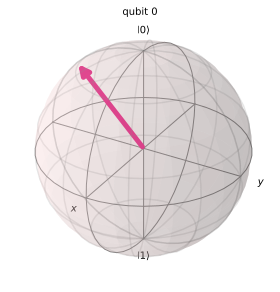

In [ ]:
# Chose the state to be discriminated by the QST protocol
Theta = 0.25 * np.pi
Phi = (2.0-0.5) * np.pi

a = np.cos(0.5 * Theta)
b = np.sin(0.5 * Theta) * np.exp(1.0j * Phi)

inputstate = [a,b]
inputvector = [np.sin(Theta)*np.cos(Phi),np.sin(Theta)*np.sin(Phi),np.cos(Theta)]
plot_bloch_multivector(inputstate)

In [24]:
#Create the actual circuit
n_qubits = 3
q = QuantumRegister(n_qubits)
c = ClassicalRegister(n_qubits)
circuit4 = QuantumCircuit(q,c)
#circuit4.h(q)


#All qubits are initialized in the same state
circuit4.u3(Theta,Phi,Lamb,q)

#but each is rotated diferently in the Bloch sphere, aligning different components to the z axis
circuit4.z(q[0])
circuit4.x(q[0])
circuit4.z(q[1])
circuit4.y(q[1])
circuit4.z(q[2])
circuit4.z(q[2])



circuit4.draw(output='mpl')

AttributeError: 'QuantumCircuit' object has no attribute 'u3'

<div class="alert alert-block alert-warning">
<b>Code Explained: </b>

The code creates a quantum circuit that consists of three qubits and three classical bits.

The first line defines the number of qubits in the circuit as n_qubits=3.

The next three lines create a QuantumRegister and a ClassicalRegister, respectively, with the specified number of qubits and classical bits.

The next line creates the QuantumCircuit object called "circuit4", using the QuantumRegister and ClassicalRegister defined earlier.

The next line applies a single-qubit gate U3 with parameters Theta, Phi, and Lamb to all qubits in the circuit. The U3 gate is a general single-qubit gate that can represent any unitary operation on a single qubit.

The remaining lines apply several single-qubit gates to the qubits in the circuit. The Z gate is applied to the first qubit, the X gate is applied to the first qubit, the Z gate is applied to the second qubit, the Y gate is applied to the second qubit, and the Z gate is applied twice to the third qubit.    
</div>

In [ ]:
simulator = BasicAer.get_backend('statevector_simulator') # the device to run on
result = execute(circuit4, simulator).result()
outputstate = result.get_statevector(circuit4, decimals=3)

print(outputstate)
plot_bloch_multivector(outputstate)

<div class="alert alert-block alert-info">
<b>Question 4:</b> Since this is a numerical simulation we can have access to the full Bloch vector of the three qubits. How do you compare them? What is the relevance of their z component?
</div>

And now the measurements:

In [ ]:
circuit4.measure(q,c)

We are now ready to run the simulation and get the "experimental" results:

In [ ]:
n_shots = int(mt.pow(2,4))
print('Number of shots:',n_shots)
backend = Aer.get_backend('qasm_simulator')
job = execute(circuit4, backend, shots=n_shots)

result = job.result()
measurement_result = result.get_counts(circuit4)
print(measurement_result)
#number = calsum(getKeysByValue(measurement_result,1)[0])/qubits
exp_results = list(measurement_result.keys())
exp_freq = list(measurement_result.values())
print(exp_results)
print(exp_freq)
print(len(exp_results[0]))

In [ ]:
exp_results = list(measurement_result.keys())
exp_freq = list(measurement_result.values())
#print(sum(exp_freq))
nx1,ny1,nz1,nx0,ny0,nz0=[0,0,0,0,0,0]
for i in range(len(exp_results)):
    nx1 += int(exp_results[i][2]) * exp_freq[i]
    nx0 += (1-int(exp_results[i][2])) * exp_freq[i]

    ny1 += int(exp_results[i][1]) * exp_freq[i]
    ny0 += (1-int(exp_results[i][1])) * exp_freq[i]

    nz1 += int(exp_results[i][0]) * exp_freq[i]
    nz0 += (1-int(exp_results[i][0])) * exp_freq[i]

#EXP = [nx1,ny1,nz1,nx0,ny0,nz0]

direct=[(nx1-nx0)/(nx1+nx0),(ny0-ny1)/(ny1+ny0),(nz0-nz1)/(nz1+nz0)]
outputvector = direct/np.linalg.norm(direct)
overlap = np.abs(np.dot(outputvector,inputvector))*100

print('input  vector:',inputvector,  np.linalg.norm(inputvector) )
print('direct estimate:',direct,  np.linalg.norm(direct) )
print('output vector:',outputvector)

overlap_evolv = [overlap]

<div class="alert alert-block alert-warning">
<b>Code Explained: </b>

This code calculates the estimated values of the six parameters that describe the quantum state of a three-qubit system, based on the measurement results obtained from a quantum state tomography protocol.

The measurement results are stored in a dictionary called measurement_result, where the keys are strings representing the binary outcomes of the measurements, and the values are the frequencies of each outcome.

The code first extracts the measurement outcomes and frequencies from the measurement_result dictionary, and then calculates the estimated values of the six parameters (nx1, ny1, nz1, nx0, ny0, and nz0) based on the measurement results. Specifically, for each qubit, the code calculates the frequency-weighted average of the measurement outcomes, where a value of 1 corresponds to a "down" measurement outcome and 0 corresponds to an "up" measurement outcome.

The resulting parameter values are used to estimate the quantum state of the system, represented by the six-element vector direct. The direct vector is then normalized and its overlap with the true state of the system (represented by the six-element vector inputvector) is calculated using the dot product. The overlap is expressed as a percentage and stored in a list called overlap_evolv.    
</div>

Now, lets bulk up this methodology:

In [ ]:
N_experiments =  int(mt.pow(2,11))
n_shots = int(mt.pow(2,6))
print('Number of shots:',n_shots)
print('Number of experiments:',N_experiments)


for n in range(N_experiments):
    #run an experiment

    backend = Aer.get_backend('qasm_simulator')
    job = execute(circuit4, backend, shots=n_shots)

    result = job.result()
    measurement_result = result.get_counts(circuit4)

    exp_results = list(measurement_result.keys())
    exp_freq = list(measurement_result.values())

    #Extract the results
    for i in range(len(exp_results)):
        nx1 += int(exp_results[i][2]) * exp_freq[i]
        nx0 += (1-int(exp_results[i][2])) * exp_freq[i]

        ny1 += int(exp_results[i][1]) * exp_freq[i]
        ny0 += (1-int(exp_results[i][1])) * exp_freq[i]

        nz1 += int(exp_results[i][0]) * exp_freq[i]
        nz0 += (1-int(exp_results[i][0])) * exp_freq[i]

    direct=[(nx1-nx0)/(nx1+nx0),(ny0-ny1)/(ny1+ny0),(nz0-nz1)/(nz1+nz0)]
    outputvector = direct/np.linalg.norm(direct)
    overlap = np.abs(np.dot(outputvector,inputvector))*100



    overlap_evolv.append(overlap)
print('input  vector:',inputvector,  np.linalg.norm(inputvector) )
print('direct estimate:',(nx1-nx0)/(nx1+nx0),(ny1-ny0)/(ny1+ny0),(nz1-nz0)/(nz1+nz0))
print('output vector:',outputvector, np.linalg.norm(outputvector) )
print('overlap:',overlap,'%' )

In [ ]:
plt.plot(overlap_evolv)
plt.show()

<div class="alert alert-block alert-info">
<b>Question 5:</b> Can you explain the rational of this algorithm?
    
Hint: Check the supplementary videos in the moodle webpage.
    
</div>

    
**Exercise 6:**

Verify whether this protocol works for a wide range of states.
    
    
### Advanced exercises (for extra credits)<a class="tocSkip">
    
**Exercise 7:**

Redesign the code to allow for quantum state tomography of mixed states.
    
**Exercise 8:**

Alter the protocol to allow for Baynesian learning.

<div class="alert alert-success">
<b>Today's afterthoughts:</b>

What has changed, if anything, in your perspective about quantum measurements after this notebook?
</div>